In [ ]:
import pandas as pd

In [ ]:
pd.read_csv('dataset1.csv')

,data,responsável,temperatura
0,sábado - 01/04/2023 00:00,Fábio,19.59
1,sábado - 01/04/2023 00:15,Fábio,19.10
2,sábado - 01/04/2023 00:30,Fábio,19.14
3,sábado - 01/04/2023 00:45,Fábio,18.55
4,sábado - 01/04/2023 01:00,Fábio,NaN
...,...,...,...
2875,domingo - 30/04/2023 22:45,Letícia,20.13
2876,domingo - 30/04/2023 23:00,Letícia,19.62
2877,domingo - 30/04/2023 23:15,Letícia,19.43
2878,domingo - 30/04/2023 23:30,Letícia,19.25


**Letra A**

In [ ]:
import pandas as pd
from datetime import datetime

df = pd.read_csv('dataset1.csv')

def data(data):
  indice = data.index('-')
  data = data[indice + 2:]
  return data


df.data = df.data.apply(data)
df.data = pd.to_datetime(df.data, format = '%d/%m/%Y %H:%M')

In [ ]:
df

,data,responsável,temperatura
0,2023-04-01 00:00:00,Fábio,19.59
1,2023-04-01 00:15:00,Fábio,19.10
2,2023-04-01 00:30:00,Fábio,19.14
3,2023-04-01 00:45:00,Fábio,18.55
4,2023-04-01 01:00:00,Fábio,NaN
...,...,...,...
2875,2023-04-30 22:45:00,Letícia,20.13
2876,2023-04-30 23:00:00,Letícia,19.62
2877,2023-04-30 23:15:00,Letícia,19.43
2878,2023-04-30 23:30:00,Letícia,19.25


**Letra B**

In [ ]:
df['dia'] = df['data'].dt.date
df['horario'] = df['data'].dt.time

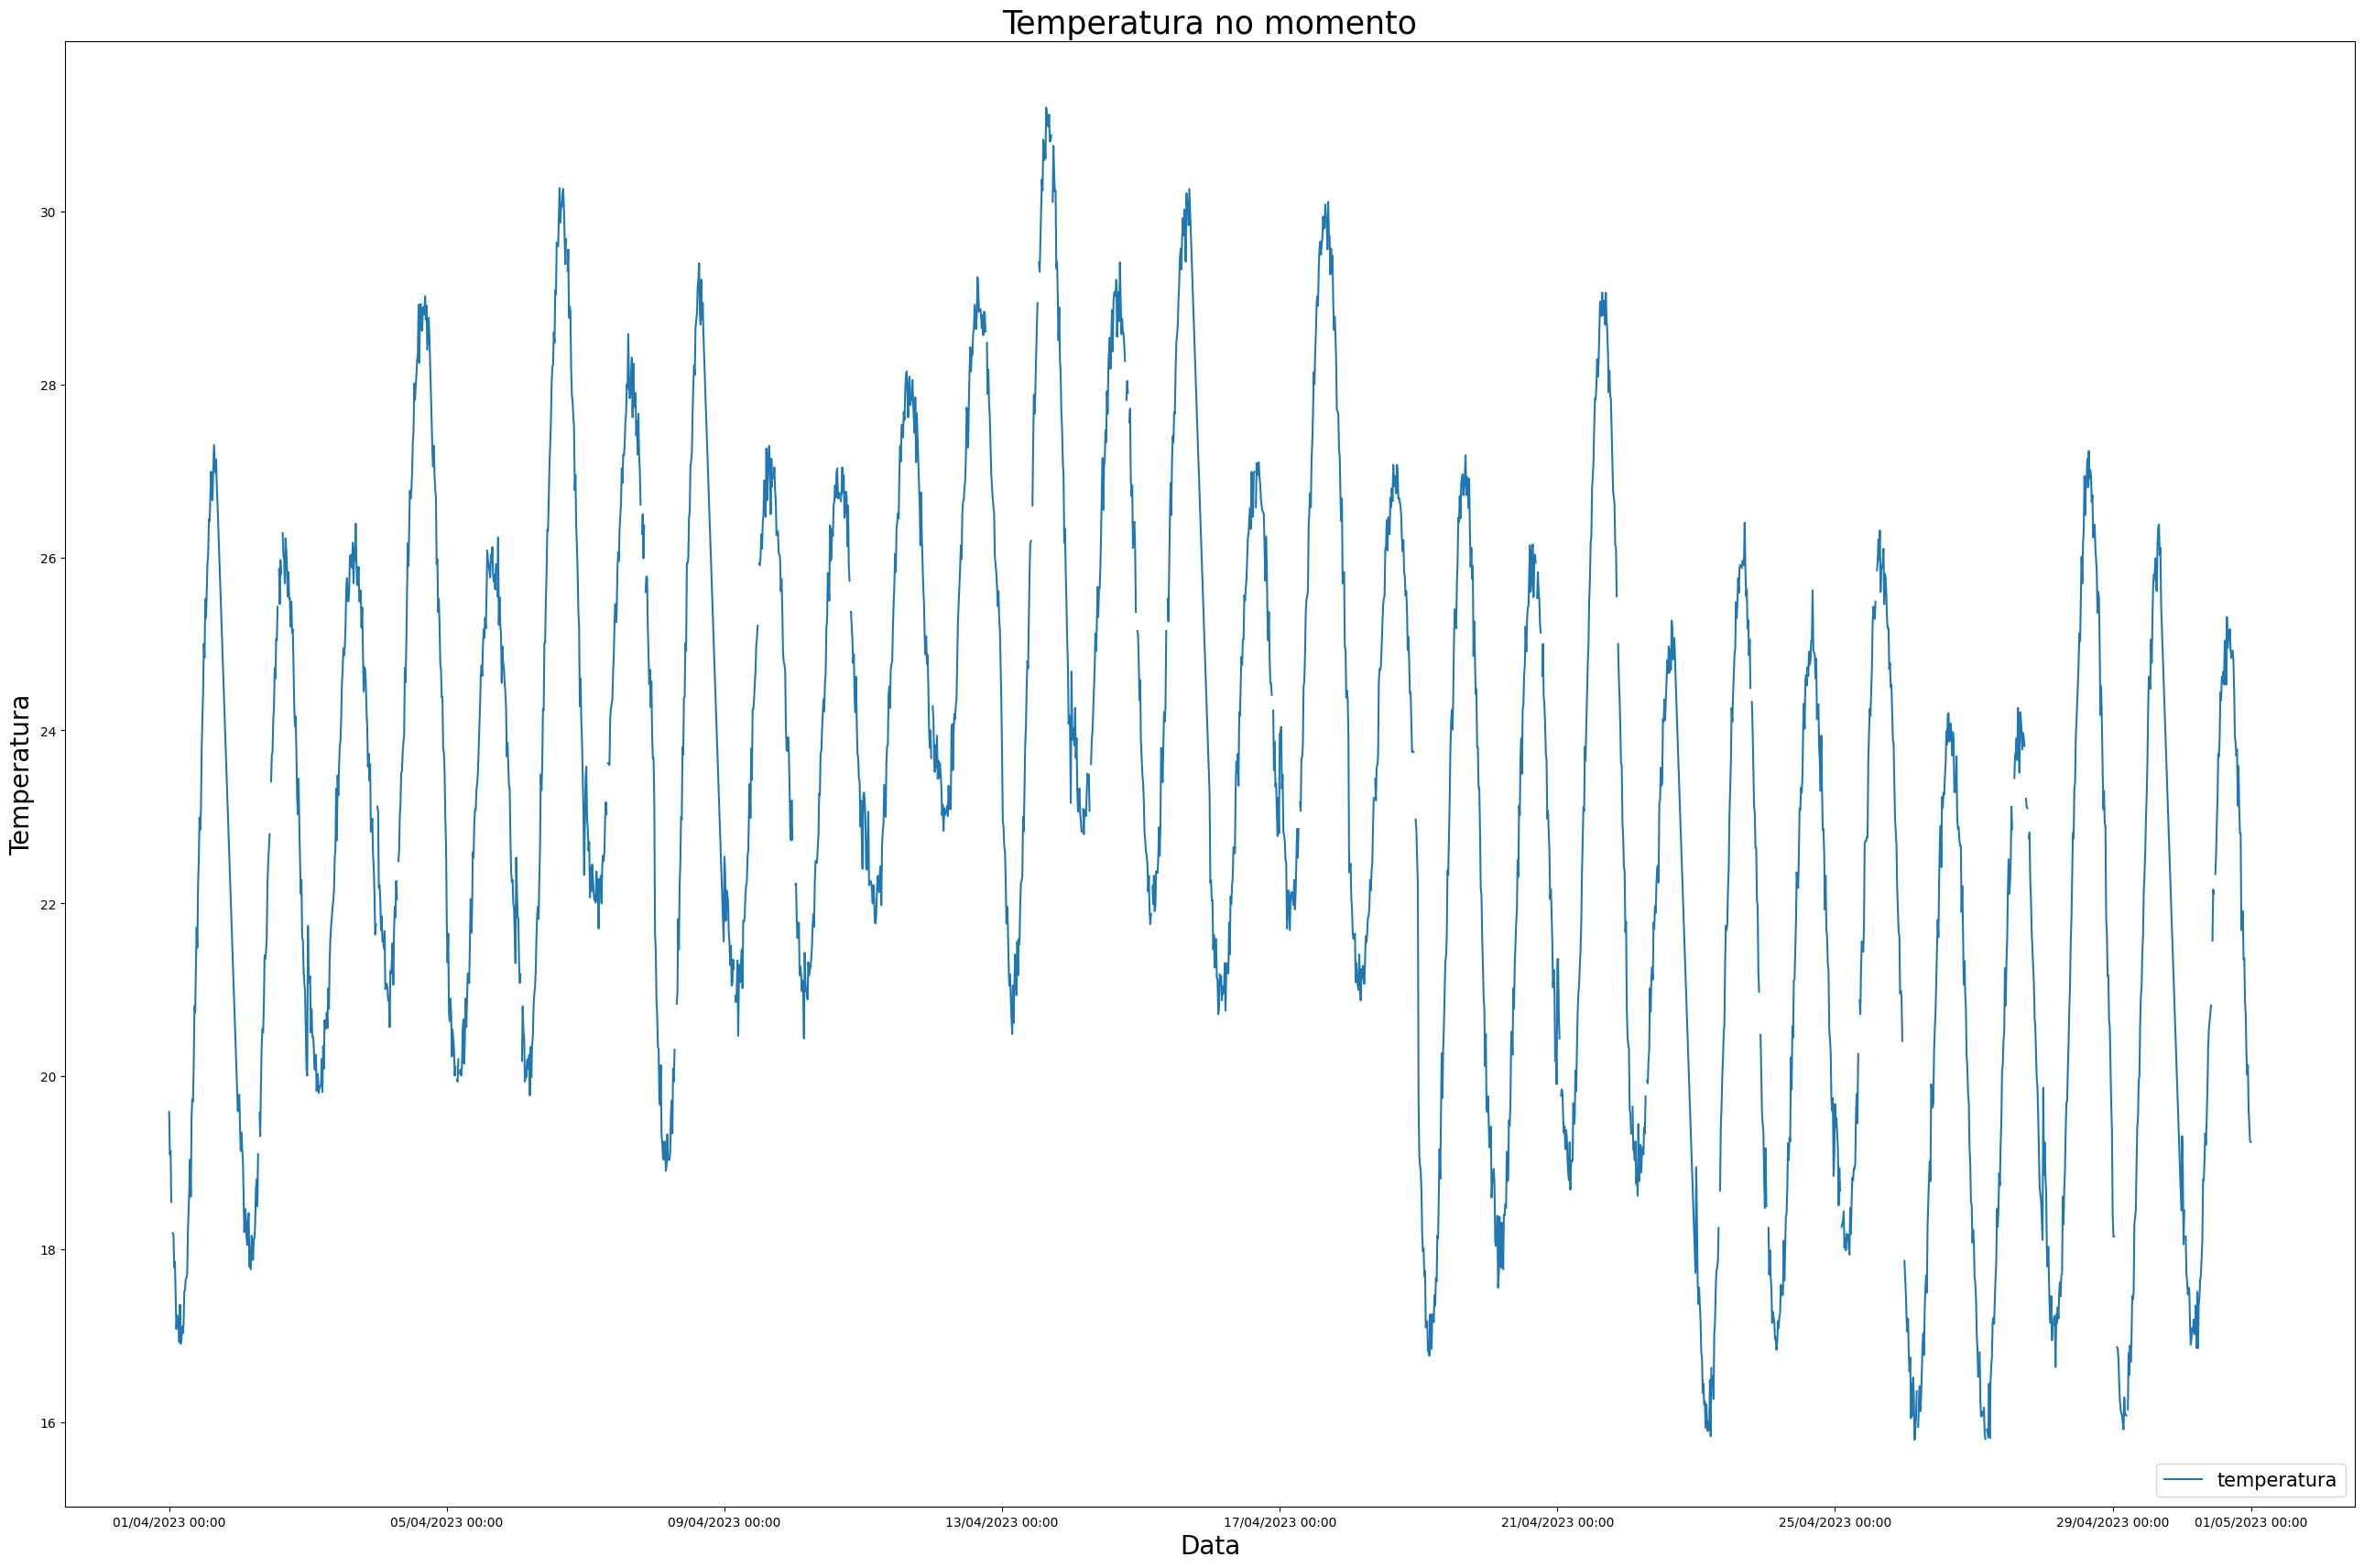

In [ ]:
import matplotlib.dates as mdates
from datetime import date
import matplotlib.pyplot as plt

formato_de_data = mdates.DateFormatter('%d/%m/%Y %H:%M')
fig = plt.figure(figsize=(25,8))
eixo = fig.add_axes([0,0,1,2])
eixo.plot(df['data'], df['temperatura'])
eixo.set_title('Temperatura no momento', fontsize=25)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)
eixo.legend(['temperatura'], loc='lower right', fontsize=15)
eixo.xaxis.set_major_formatter(formato_de_data)

**Letra C**

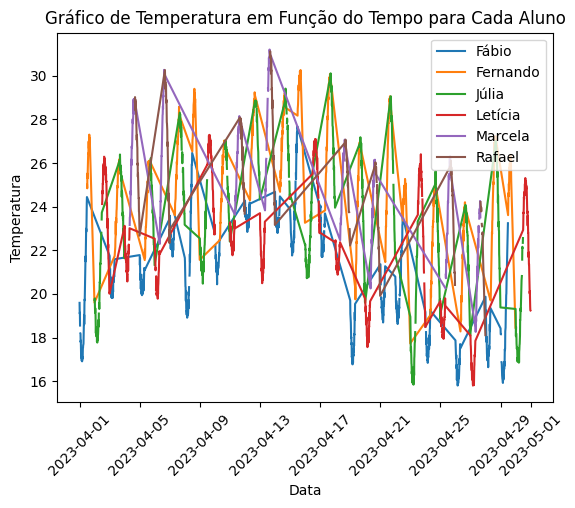

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

for aluno in df['responsável'].unique():
    df_aluno = df[df['responsável'] == aluno]
    plt.plot(df_aluno['data'], df_aluno['temperatura'], label=aluno)

plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.title('Gráfico de Temperatura em Função do Tempo para Cada Aluno')
plt.xticks(rotation=45)
plt.legend()
plt.show()

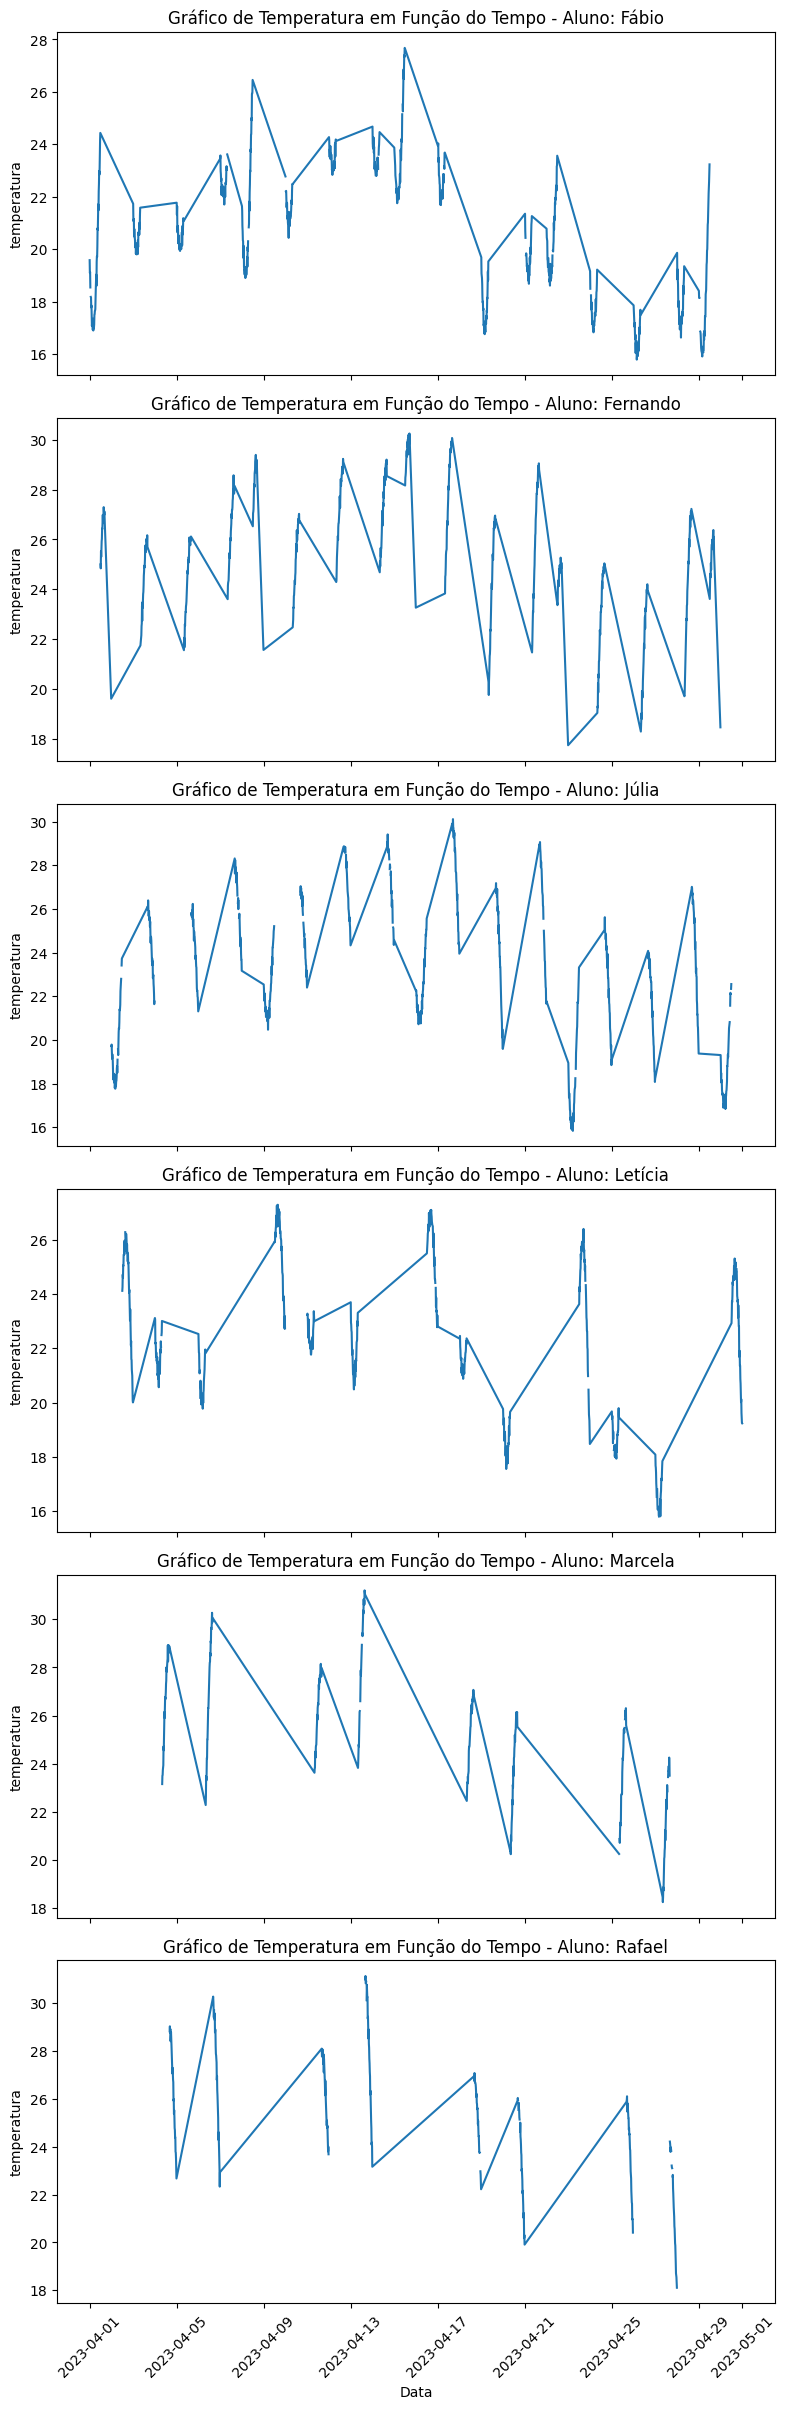

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(df['responsável'].unique()), 1, figsize=(8, 4 * len(df['responsável'].unique())), sharex=True)

for i, aluno in enumerate(df['responsável'].unique()):
    df_aluno = df[df['responsável'] == aluno]
    axs[i].plot(df_aluno['data'], df_aluno['temperatura'])
    axs[i].set_ylabel('temperatura')
    axs[i].set_title(f'Gráfico de Temperatura em Função do Tempo - Aluno: {aluno}')
    axs[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.xlabel('Data')

plt.show()

O gráfico do Rafael apresenta um comportamento suspeito já que a ausência de dados gera uma descontinuidade no gráfico.


**Letra D**

In [ ]:
import pandas as pd

df['temperatura'] = df['temperatura'].interpolate(method='linear')

if df['temperatura'].isna().any():
    df['temperatura'].fillna(method='ffill', inplace=True)
    df['temperatura'].fillna(method='bfill', inplace=True)

In [ ]:
df

,data,responsável,temperatura,dia,horario
0,2023-04-01 00:00:00,Fábio,19.59,2023-04-01,00:00:00
1,2023-04-01 00:15:00,Fábio,19.10,2023-04-01,00:15:00
2,2023-04-01 00:30:00,Fábio,19.14,2023-04-01,00:30:00
3,2023-04-01 00:45:00,Fábio,18.55,2023-04-01,00:45:00
4,2023-04-01 01:00:00,Fábio,18.37,2023-04-01,01:00:00
...,...,...,...,...,...
2875,2023-04-30 22:45:00,Letícia,20.13,2023-04-30,22:45:00
2876,2023-04-30 23:00:00,Letícia,19.62,2023-04-30,23:00:00
2877,2023-04-30 23:15:00,Letícia,19.43,2023-04-30,23:15:00
2878,2023-04-30 23:30:00,Letícia,19.25,2023-04-30,23:30:00


**Letra E**

In [ ]:
import pandas as pd
df['dia'] = pd.to_datetime(df['dia'])
df_min_temperatura = df.groupby(df['dia'].dt.date)['temperatura'].min()


dia1 = pd.to_datetime('2023-04-05').date()
dia2 = pd.to_datetime('2023-04-12').date()
dia3 = pd.to_datetime('2023-04-26').date()


temp_min1 = df_min_temperatura[dia1]
temp_min2 = df_min_temperatura[dia2]
temp_min3 = df_min_temperatura[dia3]


# Encontrar a temperatura mínima entre os dias selecionados
temp_min = min(temp_min1, temp_min2, temp_min3)

# Encontrar o dia correspondente à temperatura mínima
if temp_min == temp_min1:
    dia = dia1
elif temp_min == temp_min2:
    dia = dia2
elif temp_min == temp_min3:
    dia = dia3

print(f"A temperatura mínima entre os dias selecionados foi {temp_min} no dia {dia}")

A temperatura mínima entre os dias selecionados foi 15.8 no dia 2023-04-26


**Letra F**

In [ ]:
df['numero'] = df['dia'].dt.day
df['dia'] = df['dia'].dt.date

In [ ]:
df

,data,responsável,temperatura,dia,horario,numero
0,2023-04-01 00:00:00,Fábio,19.59,2023-04-01,00:00:00,1
1,2023-04-01 00:15:00,Fábio,19.10,2023-04-01,00:15:00,1
2,2023-04-01 00:30:00,Fábio,19.14,2023-04-01,00:30:00,1
3,2023-04-01 00:45:00,Fábio,18.55,2023-04-01,00:45:00,1
4,2023-04-01 01:00:00,Fábio,18.37,2023-04-01,01:00:00,1
...,...,...,...,...,...,...
2875,2023-04-30 22:45:00,Letícia,20.13,2023-04-30,22:45:00,30
2876,2023-04-30 23:00:00,Letícia,19.62,2023-04-30,23:00:00,30
2877,2023-04-30 23:15:00,Letícia,19.43,2023-04-30,23:15:00,30
2878,2023-04-30 23:30:00,Letícia,19.25,2023-04-30,23:30:00,30


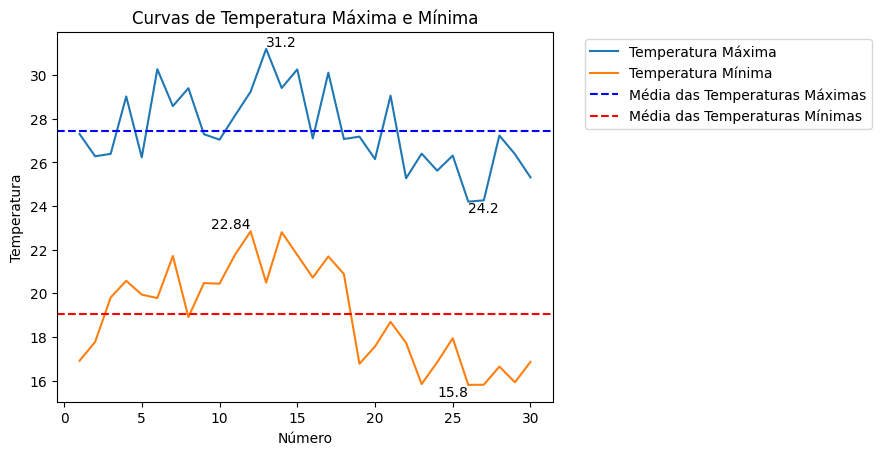

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_temp_max = df.groupby('numero')['temperatura'].max()
df_temp_min = df.groupby('numero')['temperatura'].min()

media_temp_max = df_temp_max.mean()
media_temp_min = df_temp_min.mean()

plt.plot(df_temp_max.index, df_temp_max.values, label='Temperatura Máxima')
plt.plot(df_temp_min.index, df_temp_min.values, label='Temperatura Mínima')

plt.axhline(media_temp_max, color='b', linestyle='--', label='Média das Temperaturas Máximas')
plt.axhline(media_temp_min, color='r', linestyle='--', label='Média das Temperaturas Mínimas')

plt.xlabel('Número')
plt.ylabel('Temperatura')
plt.title('Curvas de Temperatura Máxima e Mínima')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.text(df_temp_max.idxmax(), df_temp_max.max(), f'{df_temp_max.max()}', ha='left', va='bottom')
plt.text(df_temp_max.idxmin(), df_temp_max.min(), f'{df_temp_max.min()}', ha='left', va='top')
plt.text(df_temp_min.idxmax(), df_temp_min.max(), f'{df_temp_min.max()}', ha='right', va='bottom')
plt.text(df_temp_min.idxmin(), df_temp_min.min(), f'{df_temp_min.min()}', ha='right', va='top')

plt.show()